<a href="https://colab.research.google.com/github/sri2-star/FOML/blob/main/heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [9]:
df = pd.read_excel("heart_disease_dataset.xlsx")

In [10]:
print("Dataset Shape:", df.shape)

Dataset Shape: (10, 14)


In [11]:
print("\nFirst 5 rows:\n", df.head())


First 5 rows:
    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   56    1   1       120   236    0        1      178      0      0.8      2   
3   57    0   0       120   354    0        1      163      1      0.6      2   
4   54    1   1       140   192    0        1      148      0      0.4      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       0  
4   0     1       0  


In [12]:
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [13]:
X = df.drop("target", axis=1)

In [14]:
y = df["target"]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [16]:
scaler = StandardScaler()

In [17]:
X_train_scaled = scaler.fit_transform(X_train)

In [18]:
X_test_scaled = scaler.transform(X_test)

In [19]:
model = LogisticRegression()

In [20]:
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [21]:
y_pred = model.predict(X_test_scaled)

In [22]:
print("\nModel Accuracy:", accuracy_score(y_test, y_pred))


Model Accuracy: 1.0


In [23]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [24]:
cm = confusion_matrix(y_test, y_pred)

In [25]:
plt.figure(figsize=(5,4))

<Figure size 500x400 with 0 Axes>

<Figure size 500x400 with 0 Axes>

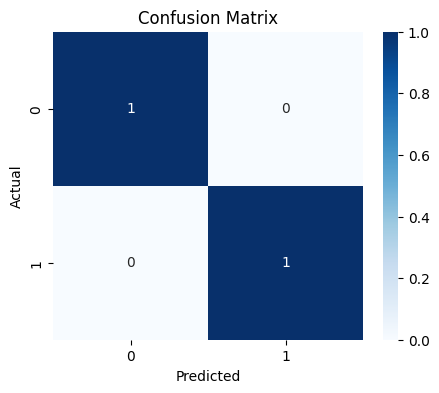

In [29]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [32]:
new_data = pd.DataFrame([[52, 1, 2, 130, 250, 0, 1, 170, 0, 1.2, 2, 0, 2]],
                        columns=X.columns)

new_data_scaled = scaler.transform(new_data)
prediction = model.predict(new_data_scaled)

In [33]:
print("\nPredicted Output (1 = Heart Disease, 0 = No Heart Disease):", prediction[0])


Predicted Output (1 = Heart Disease, 0 = No Heart Disease): 1
